# Apply Statistic To Project 1

- Define Null Hypothesis
- Set Significance levels
- Hyphothesis testing
- Reject or cant reject nul hypothesis

# Import libarary

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

from scipy.stats import ttest_ind_from_stats
from ipywidgets import interact


# Loading data

In [3]:
data = pd.read_csv('data/question1_data.csv').drop('Unnamed: 0', axis = 1)
data['Total_price'] = data.item_price * data.item_cnt_day
test = pd.read_csv('data/question1_data.csv')

In [4]:
data.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,Total_price
0,0,0,32,221.0,6.0,1326.0
1,0,0,33,347.0,3.0,1041.0
2,0,0,35,247.0,1.0,247.0
3,0,0,43,221.0,1.0,221.0
4,0,0,51,127.0,1.0,127.0


In [5]:
max(data.Total_price),min(data.Total_price), np.average(data.Total_price)

(3494160.0, 0.07, 1954.1535577839843)

# Frequentist inference Testing
- We used Frequentist inference to compare if the total sale of 2 shop are different?
    - we used t-test to find t value
        - the larger t-value is the more different from the two shop

In [6]:
def Frequentist_test(shop1_id, shop2_id):
    
    #Extract the 2 vector total_sale for 2 shop
    shop1_data = data.loc[data.shop_id == shop1_id, 'Total_price']
    shop2_data = data.loc[data.shop_id == shop2_id, 'Total_price']
    
    #Calculation the mean and std of 2 shop
    mean_shop1 = np.mean(shop1_data)
    std_shop1 = np.std(shop1_data)
    mean_shop2 = np.mean(shop2_data)
    std_shop2 = np.std(shop2_data)
    
    #Do Normal sample over mean and std of 2 shop. with 10000 sample
    np.random.seed(42)
    sample_shop1 = np.random.normal(mean_shop1, std_shop1, 10000)
    sample_shop2 = np.random.normal(mean_shop2, std_shop2, 10000)
    
    #Get the mean , std and len for t-test
    sample_mean_shop1 = np.mean(sample_shop1)
    sample_std_shop1 = np.std(sample_shop1)
    sample_len_shop1 = len(sample_shop1)
    sample_mean_shop2 = np.mean(sample_shop2)
    sample_std_shop2 = np.std(sample_shop2)
    sample_len_shop2 = len(sample_shop2)
    
    #Frequentist test from scipy.stats
    sample_test = ttest_ind_from_stats(sample_mean_shop1, sample_std_shop1, sample_len_shop1, sample_mean_shop2, sample_std_shop2, sample_len_shop2, equal_var= True)
    
    #Plot the histogram data before and after sampling
    _ = plt.figure(figsize = (15,10))
    _ = plt.subplot(2,2,1)
    _ = plt.hist(shop1_data, bins = 100)
    _ = plt.title ('shop1_data_hist')
    _ = plt.xlabel('Total sale')
    _ = plt.ylabel('Frequency')
    _ = plt.xlim(0,20000)
    
    _ = plt.subplot(2,2,2)
    _ = plt.hist(shop2_data, bins = 100)
    _ = plt.title ('shop2_data_hist')
    _ = plt.xlabel('Total sale')
    _ = plt.ylabel('Frequency')
    _ = plt.xlim(0,20000)
    
    _ = plt.subplot(2,2,3)
    _ = plt.hist(sample_shop1, bins = 30)
    _ = plt.axvline(sample_mean_shop1, c = 'r')
    _ = plt.title ('shop1_sample_hist')
    _ = plt.xlabel('Random Normal Mean')
    _ = plt.ylabel('Frequency')
    
    _ = plt.subplot(2,2,4)
    _ = plt.hist(sample_shop2, bins = 30)
    _ = plt.axvline(sample_mean_shop2, c = 'r')
    _ = plt.title ('shop2_sample_hist')
    _ = plt.xlabel('Random Normal Mean')
    _ = plt.ylabel('Frequency')
    
    
    print('We are perform the frequentist test to see how the different mean total sale of 2 data')
    print('The mean of shop_id ' + str(shop1_id) +' is: ' + str(np.round(mean_shop1,3)))
    print('The std of shop_id ' + str(shop1_id) +' is: ' + str(np.round(std_shop1,3)))
    print('The mean of shop_id ' + str(shop2_id) +' is: ' + str(np.round(mean_shop2,3)))
    print('The std of shop_id ' + str(shop2_id) +' is: ' + str(np.round(std_shop2,3)))
    print('T_Value: ' + str(np.round(sample_test[0],4)))
    print('P_Value: ' + str(sample_test[1]))
    
    print('T_value is telling us is how much is different between of 2 data shop')


In [7]:
# just choice 2 shop id from the drop box, you can see the histgram after 10000 sample 
# and t-test and p-value of that 2 shop id
# This is compare the total sale 1 shop to another
interact(Frequentist_test, shop1_id = np.arange(0,60,1),shop2_id = np.arange(1,60,1))

interactive(children=(Dropdown(description='shop1_id', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, …

<function __main__.Frequentist_test(shop1_id, shop2_id)>

# Bootstap Inference Testing

# Define function

In [9]:
#Emprical Cumulative density function
def ecdf(data):
    x = sorted(data)
    y = np.arange(1, len(x)+ 1)/len(x)
    return x,y

In [10]:
#Function for bootstrap replication
def bs_replicate_1d(data,func):
    return func(np.random.choice(data, size=len(data)))
def bs_draw_replicate(data, func, size = 1):
    #initialize array of replicate
    bs_rep = np.empty(size)
    #Genrate replicate
    for i in range(size):
        bs_rep[i]= bs_replicate_1d(data,func)
    return bs_rep    

# Get Total_price from data
- We will perform the hypothesis test to prove if the average of total sale was greater than the mean with our 95%  confidence interval.

In [11]:
#Get the array data from item_cnt
origin = data.Total_price

In [12]:
#calculation the mean and std of the origin series data
mean = np.mean(origin)
std = np.std(origin)
mean, std

(1954.1535577839843, 10430.04729873489)

# Define Null hypothesis
- Ho(null hypothesis) : is greater than the  mean of total_price sale of the data
- Ha(alternative hypothesis)  : is less than the mean of total_price sale of data of data
- Ho > 1954.15
- Ha <= 1954.15

# Choice 95% Confidence Interval
- when we are choice 95% confidence interval. So we will have our significane levels is 5%
- Base on I define the null hypothesis, so we will do one-tail testing.
- So alpha = 5% = 0.05 (we will compare this number with p-value to determine reject the null hypothesis or not)



# Hypothesis Testing

- we set them random seed to 47, so we can get same result all the time
- We do simulate the same lenght as the total_price, and random choice data point point from total_price, then we calculate the mean of new sampling. we repeating it 1000 time. It mean we will have 1000 new mean total_price it was generation base on total_price data.

In [13]:
#Do sampling 1000 time from the origin data
np.random.seed(47)
sampling = bs_draw_replicate(origin, np.mean, 1000)

In [14]:
mean_sampling = np.mean(sampling)
x,y = ecdf(sampling)


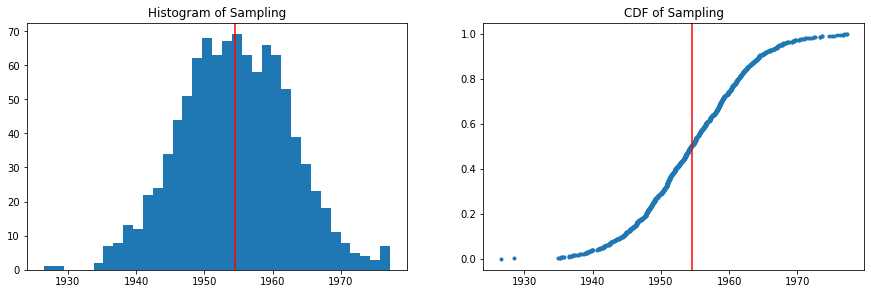

In [26]:
_ = plt.figure(figsize = (15,10))
_ = plt.subplot(2,2,1)
_ = plt.hist(sampling, bins = 35)
_ = plt.title('Histogram of Sampling')
_ = plt.axvline(mean_sampling, c = 'red')
_ = plt.subplot(2,2,2)
_ = plt.plot(x,y, marker = '.', linestyle = 'none')
_ = plt.title('CDF of Sampling')
_ = plt.axvline(mean_sampling, c = 'red')


In [16]:
#calcualtion 95% confidence interval
confidence = np.percentile(sampling, [2.5, 97.5])
confidence

array([1939.09694122, 1970.31675134])

In [25]:
p_value = np.sum(sampling > mean) / len(sampling)
p_value

0.514

- As p = 0.514, so we know that about 51.4% that data was higher than the mean
- And the 95% confidence interval is [1939.1,1970.3].
- The p value is so high so we can not reject Null hypothesis

# Conclusion

- We can not reject Null hypothesis
- p-value is 0.514
- the standard deviation is so large


